# Data Analysis Project 1
**Matan Tsafrir, Noga Gottlieb, Maya Amit** 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#loading the dataset and displaying the first 40 rows
data = pd.read_csv('movieReplicationSet.csv')
data.head(40)

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
5,3.0,NaN,NaN,2.5,2.0,NaN,NaN,NaN,NaN,4.0,...,4.0,4.0,1.0,4.0,5.0,3.0,1.0,1.0,1,0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,1.0,5.0,3.0,5.0,5.0,4.0,3.0,1.0,0,0
7,3.5,NaN,3.5,2.5,3.0,3.0,3.0,3.5,4.0,4.0,...,4.0,5.0,3.0,5.0,5.0,4.0,3.0,1.0,0,1
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,5.0,3.0,6.0,5.0,1.0,3.0,1.0,0,1
9,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,3.0,...,1.0,4.0,3.0,5.0,5.0,3.0,2.0,2.0,-1,1


# Question 1

Are movies that are more popular (operationalized as having more ratings) rated higher than movies that
are less popular?

**EDA (Exploratory Data Analysis)**

In [3]:
#calculating the popularity of each movie based on number of ratings
popularity = []
for column in data.columns[0:400]:
    count = data[column].count()
    popularity.append(count)
    np.array(popularity)
print(popularity)
print(len(popularity))

[np.int64(76), np.int64(71), np.int64(453), np.int64(289), np.int64(463), np.int64(128), np.int64(182), np.int64(254), np.int64(137), np.int64(588), np.int64(404), np.int64(147), np.int64(400), np.int64(91), np.int64(572), np.int64(76), np.int64(384), np.int64(357), np.int64(370), np.int64(187), np.int64(140), np.int64(546), np.int64(509), np.int64(151), np.int64(205), np.int64(87), np.int64(465), np.int64(77), np.int64(137), np.int64(361), np.int64(478), np.int64(337), np.int64(481), np.int64(345), np.int64(357), np.int64(374), np.int64(78), np.int64(566), np.int64(319), np.int64(236), np.int64(656), np.int64(661), np.int64(80), np.int64(95), np.int64(276), np.int64(82), np.int64(341), np.int64(532), np.int64(117), np.int64(189), np.int64(124), np.int64(475), np.int64(261), np.int64(266), np.int64(439), np.int64(645), np.int64(184), np.int64(965), np.int64(516), np.int64(152), np.int64(116), np.int64(127), np.int64(129), np.int64(76), np.int64(80), np.int64(236), np.int64(119), np.int

In [4]:
#calculating the median popularity
pop_median = np.median(popularity)
print("The median popularity is:", pop_median)

The median popularity is: 197.5


In [5]:
#dividing movies into low and high popularity groups
low_group = np.where(popularity < pop_median)
high_group = np.where(popularity >= pop_median)
print("Low popularity group indices:", low_group)       
print("High popularity group indices:", high_group)


Low popularity group indices: (array([  0,   1,   5,   6,   8,  11,  13,  15,  19,  20,  23,  25,  27,
        28,  36,  42,  43,  45,  48,  49,  50,  56,  59,  60,  61,  62,
        63,  64,  66,  67,  68,  69,  70,  71,  76,  77,  78,  79,  86,
        88,  89,  91,  92,  94,  96,  98, 100, 101, 102, 104, 105, 106,
       107, 108, 109, 111, 114, 115, 116, 118, 119, 120, 122, 123, 125,
       126, 127, 128, 129, 130, 132, 133, 134, 135, 136, 139, 143, 145,
       146, 152, 153, 155, 156, 159, 161, 162, 163, 167, 168, 173, 175,
       178, 179, 180, 185, 187, 189, 192, 193, 194, 195, 196, 200, 202,
       203, 208, 212, 213, 215, 218, 221, 224, 226, 228, 229, 231, 232,
       233, 236, 240, 242, 247, 249, 250, 251, 254, 256, 259, 260, 263,
       266, 268, 270, 271, 275, 277, 279, 280, 282, 283, 284, 287, 289,
       290, 291, 295, 298, 299, 300, 301, 302, 303, 304, 309, 311, 314,
       320, 321, 323, 324, 325, 326, 327, 331, 332, 333, 334, 335, 337,
       339, 345, 346, 348, 349, 3

In [6]:
# Getting the indices of low and high popularity movies
low_indices = low_group[0]
high_indices = high_group[0]

# Getting the column names for low and high popularity movies
low_columns = data.columns[low_indices]
high_columns = data.columns[high_indices]

print("Low popularity columns:", low_columns)
print("High popularity columns:", high_columns)

Low popularity columns: Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Snatch (2000)', 'Rambo: First Blood Part II (1985)',
       'Let the Right One In (2008)', 'The Machinist (2004)', 'Brazil (1985)',
       'Change of Habit (1969)', 'Night of the Living Dead (1968)',
       'Man on Fire (2004)',
       ...
       'On Golden Pond (1981)', 'The Descent (2005)', 'Runaway Bride (1999)',
       'Gods and Generals (2003)', 'My Father and My Son (2005)',
       'The Usual Suspects (1995)', 'Patton (1970)', 'Twister (1996)',
       'MacArthur (1977)', 'Look Who's Talking (1989)'],
      dtype='object', length=200)
High popularity columns: Index(['Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Fargo (1996)',
       'Black Swan (2010)', 'King Kong (1976)',
       'A Nightmare on Elm Street (1984)', 'The Fast and the Furious (2001)',
       'American Beauty (1999)', 'Psycho (1960)',
       ...
       'Inception (2010)', 

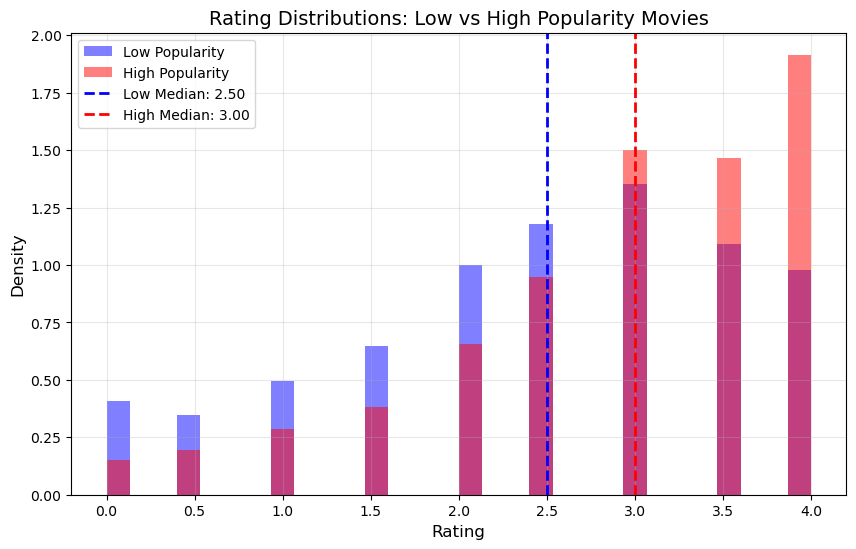

Low Popularity Median: 2.500
High Popularity Median: 3.000
Difference: 0.500


In [7]:
#plotting the distributions of ratings for low and high popularity movies
import matplotlib.pyplot as plt
import numpy as np

# Collect all ratings for each group
low_pop_ratings = []
high_pop_ratings = []

# Assuming ratings are the values in each column
for idx in low_indices:
    col_ratings = data.iloc[:, idx].dropna()
    low_pop_ratings.extend(col_ratings)

for idx in high_indices:
    col_ratings = data.iloc[:, idx].dropna()
    high_pop_ratings.extend(col_ratings)

# Convert to arrays
low_pop_ratings = np.array(low_pop_ratings)
high_pop_ratings = np.array(high_pop_ratings)

# Calculate medians
low_median = np.median(low_pop_ratings)
high_median = np.median(high_pop_ratings)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms
plt.hist(low_pop_ratings, bins=30, alpha=0.5, label='Low Popularity', color='blue', density=True)
plt.hist(high_pop_ratings, bins=30, alpha=0.5, label='High Popularity', color='red', density=True)

# Add median lines
plt.axvline(low_median, color='blue', linestyle='--', linewidth=2, label=f'Low Median: {low_median:.2f}')
plt.axvline(high_median, color='red', linestyle='--', linewidth=2, label=f'High Median: {high_median:.2f}')

# Labels and formatting
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.title('Rating Distributions: Low vs High Popularity Movies', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

# Print the median values
print(f"Low Popularity Median: {low_median:.3f}")
print(f"High Popularity Median: {high_median:.3f}")
print(f"Difference: {high_median - low_median:.3f}")

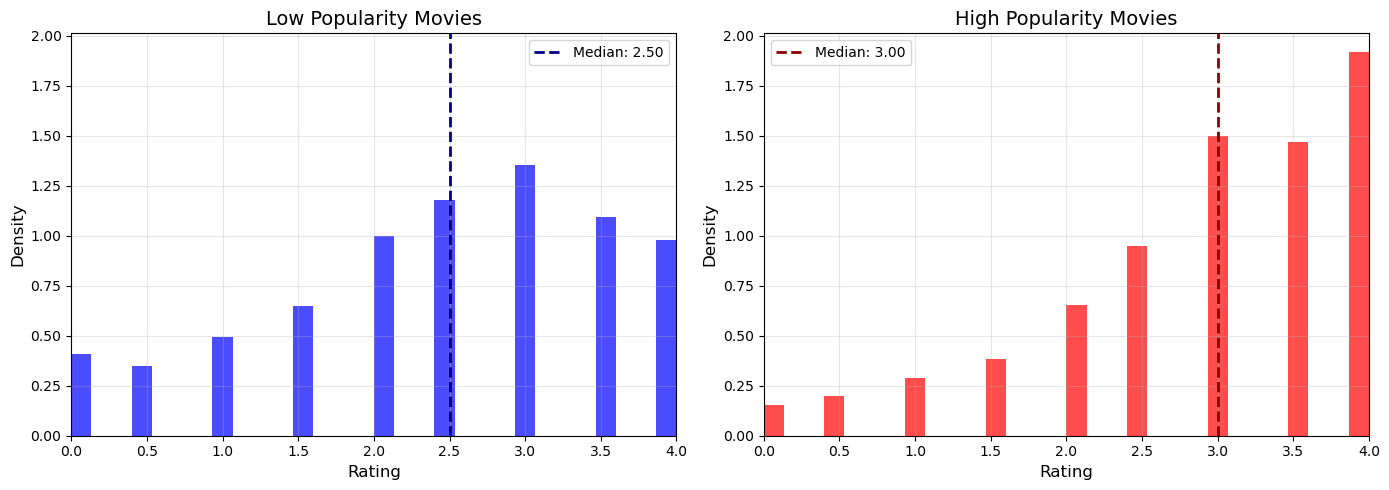

Low Popularity: Median = 2.500, N = 22000
High Popularity: Median = 3.000, N = 90214
Difference: 0.500


In [8]:
#plotting side-by-side distributions for better comparison
import matplotlib.pyplot as plt
import numpy as np

# Collect all ratings for each group
low_pop_ratings = []
high_pop_ratings = []

# Assuming ratings are the values in each column
for idx in low_indices:
    col_ratings = data.iloc[:, idx].dropna()
    low_pop_ratings.extend(col_ratings)

for idx in high_indices:
    col_ratings = data.iloc[:, idx].dropna()
    high_pop_ratings.extend(col_ratings)

# Convert to arrays
low_pop_ratings = np.array(low_pop_ratings)
high_pop_ratings = np.array(high_pop_ratings)

# Calculate medians
low_median = np.median(low_pop_ratings)
high_median = np.median(high_pop_ratings)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot low popularity distribution
ax1.hist(low_pop_ratings, bins=30, alpha=0.7, color='blue', density=True)
ax1.axvline(low_median, color='darkblue', linestyle='--', linewidth=2, label=f'Median: {low_median:.2f}')
ax1.set_xlabel('Rating', fontsize=12)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Low Popularity Movies', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot high popularity distribution
ax2.hist(high_pop_ratings, bins=30, alpha=0.7, color='red', density=True)
ax2.axvline(high_median, color='darkred', linestyle='--', linewidth=2, label=f'Median: {high_median:.2f}')
ax2.set_xlabel('Rating', fontsize=12)
ax2.set_ylabel('Density', fontsize=12)
ax2.set_title('High Popularity Movies', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Make sure both plots have the same x-axis range for fair comparison
x_min = min(low_pop_ratings.min(), high_pop_ratings.min())
x_max = max(low_pop_ratings.max(), high_pop_ratings.max())
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)

# Also match y-axis for better comparison
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

# Print summary comparison
print(f"Low Popularity: Median = {low_median:.3f}, N = {len(low_pop_ratings)}")
print(f"High Popularity: Median = {high_median:.3f}, N = {len(high_pop_ratings)}")
print(f"Difference: {high_median - low_median:.3f}")

In [9]:
# Get the actual arrays from np.where() tuple
low_indices = low_group[0]  # Extract from tuple
high_indices = high_group[0]

# Collect all non-NaN ratings from low popularity columns
low_pop_ratings = []
for idx in low_indices:
    col_ratings = data.iloc[:, idx].dropna()  # Get all non-NaN ratings for this movie
    low_pop_ratings.extend(col_ratings.tolist())

# Same for high popularity
high_pop_ratings = []
for idx in high_indices:
    col_ratings = data.iloc[:, idx].dropna()
    high_pop_ratings.extend(col_ratings.tolist())

# Convert to arrays
low_pop_ratings = np.array(low_pop_ratings)
high_pop_ratings = np.array(high_pop_ratings)

print(f"Low popularity: {len(low_pop_ratings)} total ratings")
print(f"High popularity: {len(high_pop_ratings)} total ratings")

Low popularity: 22000 total ratings
High popularity: 90214 total ratings


**Hypothsis Testing - Mann-Whitney U test**

In [10]:
#hypothesis testing using Mann-Whitney U test
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# First, get the popularity counts for each movie (you already did this)
popularity = data.iloc[:, 0:400].count().values  # Count non-NaN ratings per movie
pop_median = np.median(popularity)

# Split into groups based on median popularity
low_group = np.where(popularity < pop_median)[0]  # [0] to get the array from tuple
high_group = np.where(popularity >= pop_median)[0]

print(f"Median popularity: {pop_median} ratings")
print(f"Low popularity group: {len(low_group)} movies")
print(f"High popularity group: {len(high_group)} movies")

# Now collect all ratings from each group
low_pop_ratings = []
for idx in low_group:
    movie_ratings = data.iloc[:, idx].dropna()  # Get all non-NaN ratings for this movie
    low_pop_ratings.extend(movie_ratings.tolist())

high_pop_ratings = []
for idx in high_group:
    movie_ratings = data.iloc[:, idx].dropna()
    high_pop_ratings.extend(movie_ratings.tolist())

# Convert to arrays
low_pop_ratings = np.array(low_pop_ratings)
high_pop_ratings = np.array(high_pop_ratings)

print(f"\nTotal ratings collected:")
print(f"Low popularity movies: {len(low_pop_ratings):,} ratings")
print(f"High popularity movies: {len(high_pop_ratings):,} ratings")

# Perform Mann-Whitney U test
u_stat, p_value = stats.mannwhitneyu(low_pop_ratings, high_pop_ratings, alternative='two-sided')

print("\nMann-Whitney U Test Results")
print(f"U-statistic: {u_stat:,.0f}")
print(f"p-value: {p_value:.6e}")

# Basic statistics
print(f"\nSummary Statistics")
print(f"Low popularity movies:")
print(f"  Mean rating: {np.mean(low_pop_ratings):.3f}")
print(f"  Median rating: {np.median(low_pop_ratings):.3f}")
print(f"  Std dev: {np.std(low_pop_ratings):.3f}")

print(f"\nHigh popularity movies:")
print(f"  Mean rating: {np.mean(high_pop_ratings):.3f}")
print(f"  Median rating: {np.median(high_pop_ratings):.3f}")
print(f"  Std dev: {np.std(high_pop_ratings):.3f}")

# Interpretation
if p_value < 0.05:
    if np.median(high_pop_ratings) > np.median(low_pop_ratings):
        print("\n✓ Popular movies have significantly higher ratings!")
    else:
        print("\n✓ Less popular movies have significantly higher ratings!")
else:
    print("\n✓ No significant difference in ratings between groups")

Median popularity: 197.5 ratings
Low popularity group: 200 movies
High popularity group: 200 movies

Total ratings collected:
Low popularity movies: 22,000 ratings
High popularity movies: 90,214 ratings

Mann-Whitney U Test Results
U-statistic: 741,899,856
p-value: 0.000000e+00

Summary Statistics
Low popularity movies:
  Mean rating: 2.451
  Median rating: 2.500
  Std dev: 1.130

High popularity movies:
  Mean rating: 2.923
  Median rating: 3.000
  Std dev: 1.016

✓ Popular movies have significantly higher ratings!


# Question 2

Are movies that are newer rated differently than movies that are older?

**EDA (Exploratory Data Analysis)**

In [11]:
# Access column names (headers)
column_names = data.columns

# Get a specific column's header (e.g., first movie column)
first_movie = data.columns[0]
print(first_movie)  # "The Life of David Gale (2003)"

The Life of David Gale (2003)


In [12]:
# Function to extract year from column name
import re

def extract_year(column_name):
    match = re.search(r'\((\d{4})\)', column_name)
    if match:
        return int(match.group(1))
    return None


In [13]:
# Extract years for the first 400 movie columns
years = [extract_year(col) for col in data.columns[0:400]]

In [14]:
print(years)

[2003, 1999, 2012, 1979, 1989, 2000, 1985, 1996, 2008, 2010, 1976, 2004, 1984, 1985, 2001, 1969, 1999, 1960, 2003, 1968, 2004, 1977, 1991, 2001, 2002, 1996, 1993, 2001, 1999, 1986, 2001, 1974, 1984, 1981, 1999, 2003, 1994, 1997, 1974, 1976, 1985, 2004, 2002, 1995, 1995, 1996, 1997, 2001, 1986, 2002, 1983, 2000, 2003, 1979, 2009, 1995, 1976, 2004, 1997, 2005, 1995, 1971, 2002, 2003, 2004, 1982, 1998, 1968, 1972, 1972, 1996, 1970, 2003, 1967, 1973, 2006, 2000, 1968, 2003, 1998, 2009, 2002, 1998, 1999, 2013, 1986, 2002, 2001, 1995, 2001, 1989, 1984, 2002, 2002, 1982, 2014, 1987, 2003, 1967, 2001, 1978, 2001, 1995, 2003, 1980, 1987, 1979, 1994, 2003, 2000, 1988, 1994, 2009, 1980, 1974, 2000, 1996, 2010, 1991, 1996, 2003, 1976, 1966, 1997, 2001, 1999, 1995, 1996, 1974, 1995, 1998, 2000, 1990, 1980, 1971, 1966, 1993, 1999, 2003, 1970, 1999, 1997, 2008, 2002, 1995, 1990, 2014, 2011, 1993, 2016, 2000, 1982, 1992, 1968, 2003, 1998, 2002, 1999, 2014, 2007, 1991, 2002, 1966, 2002, 1997, 2015, 199

In [15]:
median_year = np.median(years)
print("Median year of release:", median_year)

Median year of release: 1999.0


In [16]:
# Dividing movies into low and high year groups
low_year_group = np.where(np.array(years) < median_year)
high_year_group = np.where(np.array(years) >= median_year)
print("Low year group indices:", low_year_group)
print("High year group indices:", high_year_group)

Low year group indices: (array([  3,   4,   6,   7,  10,  12,  13,  15,  17,  19,  21,  22,  25,
        26,  29,  31,  32,  33,  36,  37,  38,  39,  40,  43,  44,  45,
        46,  48,  50,  53,  55,  56,  58,  60,  61,  65,  66,  67,  68,
        69,  70,  71,  73,  74,  77,  79,  82,  85,  88,  90,  91,  94,
        96,  98, 100, 102, 104, 105, 106, 107, 110, 111, 113, 114, 116,
       118, 119, 121, 122, 123, 126, 127, 128, 129, 130, 132, 133, 134,
       135, 136, 139, 141, 144, 145, 148, 151, 152, 153, 155, 160, 162,
       164, 166, 167, 169, 173, 174, 175, 177, 180, 181, 182, 183, 185,
       189, 192, 195, 197, 200, 203, 206, 207, 208, 209, 211, 214, 217,
       220, 221, 223, 226, 228, 229, 231, 233, 236, 237, 240, 241, 243,
       250, 254, 256, 260, 261, 265, 268, 271, 274, 276, 280, 282, 285,
       290, 292, 293, 295, 297, 298, 300, 302, 303, 305, 308, 309, 314,
       318, 320, 322, 324, 325, 326, 327, 329, 330, 331, 332, 334, 342,
       344, 345, 347, 350, 352, 356, 35

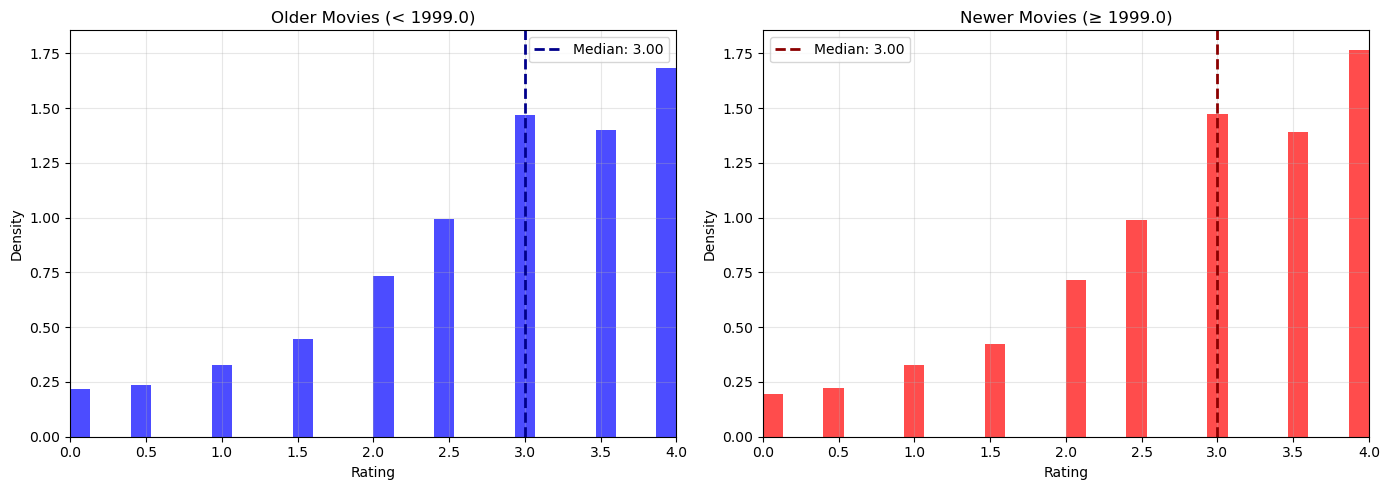


Older movies: Median = 3.000, N = 46,524
Newer movies: Median = 3.000, N = 65,690
Difference: 0.000


In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Extract indices from tuples
low_year_indices = low_year_group[0]
high_year_indices = high_year_group[0]

# Collect ratings for each year group
low_year_ratings = []
for idx in low_year_indices:
    movie_ratings = data.iloc[:, idx].dropna()
    low_year_ratings.extend(movie_ratings.tolist())

high_year_ratings = []
for idx in high_year_indices:
    movie_ratings = data.iloc[:, idx].dropna()
    high_year_ratings.extend(movie_ratings.tolist())

# Convert to arrays
low_year_ratings = np.array(low_year_ratings)
high_year_ratings = np.array(high_year_ratings)

# Calculate medians
low_median = np.median(low_year_ratings)
high_median = np.median(high_year_ratings)

# Plot side-by-side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Older movies
ax1.hist(low_year_ratings, bins=30, alpha=0.7, color='blue', density=True)
ax1.axvline(low_median, color='darkblue', linestyle='--', linewidth=2, label=f'Median: {low_median:.2f}')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Density')
ax1.set_title(f'Older Movies (< {median_year})')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Newer movies
ax2.hist(high_year_ratings, bins=30, alpha=0.7, color='red', density=True)
ax2.axvline(high_median, color='darkred', linestyle='--', linewidth=2, label=f'Median: {high_median:.2f}')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Density')
ax2.set_title(f'Newer Movies (≥ {median_year})')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Match axes
x_min = min(low_year_ratings.min(), high_year_ratings.min())
x_max = max(low_year_ratings.max(), high_year_ratings.max())
ax1.set_xlim(x_min, x_max)
ax2.set_xlim(x_min, x_max)
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
ax1.set_ylim(0, y_max)
ax2.set_ylim(0, y_max)

plt.tight_layout()
plt.show()

# Summary stats
print(f"\nOlder movies: Median = {low_median:.3f}, N = {len(low_year_ratings):,}")
print(f"Newer movies: Median = {high_median:.3f}, N = {len(high_year_ratings):,}")
print(f"Difference: {high_median - low_median:.3f}")

**Hypothsis Testing - KS test**

KS statistic: 0.0112
p-value: 0.002252


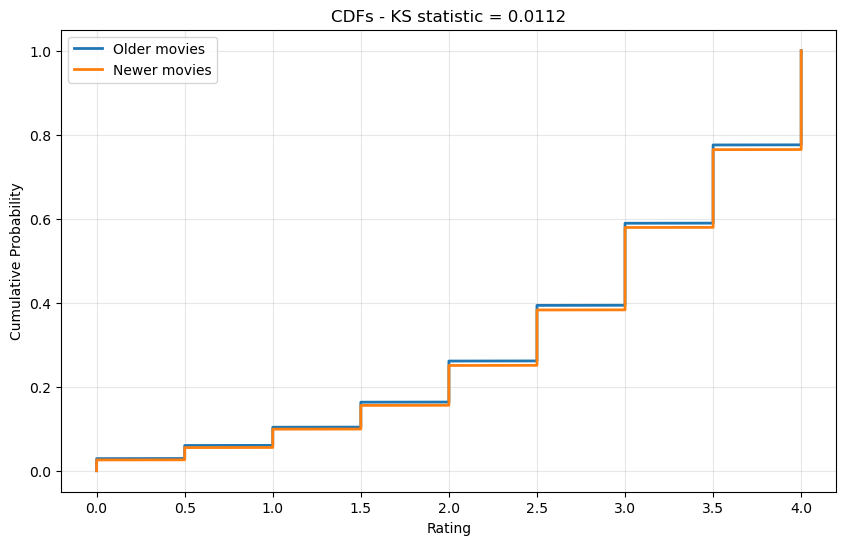

In [18]:
from scipy import stats

# Perform KS test
ks_stat, ks_pvalue = stats.ks_2samp(low_year_ratings, high_year_ratings)

print(f"KS statistic: {ks_stat:.4f}")
print(f"p-value: {ks_pvalue:.6f}")

# Visualize CDFs to see what KS is testing
plt.figure(figsize=(10, 6))
sorted_low = np.sort(low_year_ratings)
sorted_high = np.sort(high_year_ratings)
plt.plot(sorted_low, np.linspace(0, 1, len(sorted_low)), label='Older movies', linewidth=2)
plt.plot(sorted_high, np.linspace(0, 1, len(sorted_high)), label='Newer movies', linewidth=2)
plt.xlabel('Rating')
plt.ylabel('Cumulative Probability')
plt.title(f'CDFs - KS statistic = {ks_stat:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Question 3

**Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?**

**Hypothsis Testing - KS test**

In [19]:
from scipy.stats import ks_2samp
import numpy as np

# Identify movie and gender columns
shrek_idx = list(data.columns[:400]).index('Shrek (2001)')
shrek_ratings = data.iloc[:, shrek_idx]
gender = data.iloc[:, 474]  # 1 = female, 2 = male

# Keep only male/female with valid ratings
mask = (~np.isnan(shrek_ratings)) & ((gender == 1) | (gender == 2))
shrek_ratings = shrek_ratings[mask]
gender = gender[mask]

# Split by gender
female_ratings = shrek_ratings[gender == 1]
male_ratings   = shrek_ratings[gender == 2]

# KS test (two-sided)
ks_stat, ks_p = ks_2samp(female_ratings, male_ratings)

print(f"KS statistic = {ks_stat:.4f}")
print(f"p-value = {ks_p:.6f}")
print(f"Median (female) = {np.median(female_ratings):.2f}")
print(f"Median (male)   = {np.median(male_ratings):.2f}")

KS statistic = 0.0980
p-value = 0.056082
Median (female) = 3.50
Median (male)   = 3.00


# Question 4

**What proportion of movies are rated differently by male and female viewers?**

**EDA (Exploratory Data Analysis)**

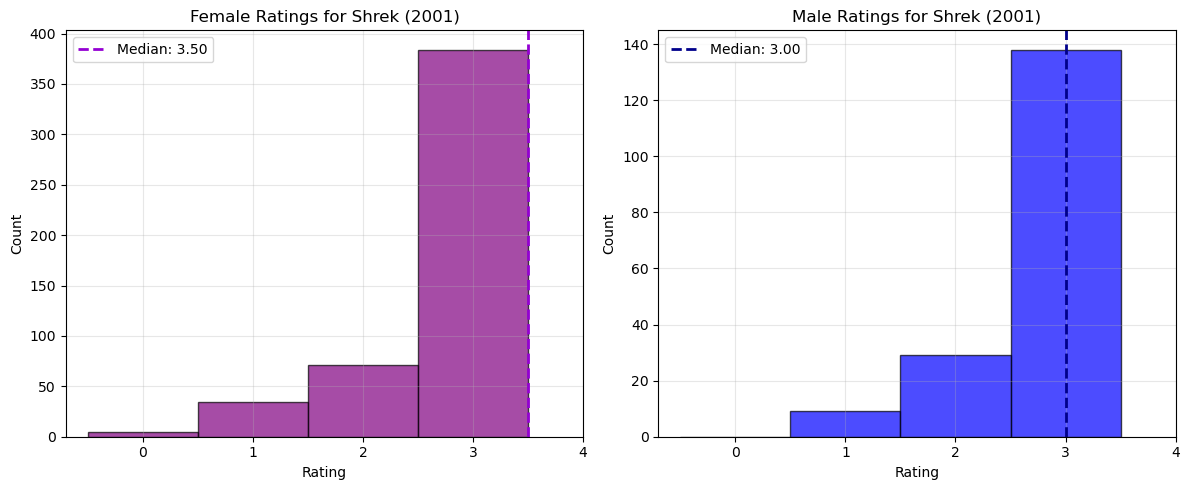

Female: n=743, median=3.50
Male: n=241, median=3.00
Mann-Whitney U: p=0.0505


In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Find Shrek column (adjust name if needed)
shrek_col = None
for col in data.columns:
    if 'Shrek' in col and '2001' in col:
        shrek_col = col
        break

if shrek_col:
    # Filter for male and female only
    gender_col = 'Gender identity (1 = female; 2 = male; 3 = self-described)'
    valid_mask = data[gender_col].isin([1, 2])
    filtered_data = data[valid_mask]
    
    # Split ratings by gender
    female_ratings = filtered_data[shrek_col][filtered_data[gender_col] == 1].dropna()
    male_ratings = filtered_data[shrek_col][filtered_data[gender_col] == 2].dropna()
    
    # Calculate medians
    female_median = np.median(female_ratings)
    male_median = np.median(male_ratings)
    
    # Plot side-by-side
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # Female distribution
    ax1.hist(female_ratings, bins=np.arange(0, 5) - 0.5, alpha=0.7, color='purple', edgecolor='black')
    ax1.axvline(female_median, color='darkviolet', linestyle='--', linewidth=2, label=f'Median: {female_median:.2f}')
    ax1.set_xlabel('Rating')
    ax1.set_ylabel('Count')
    ax1.set_title(f'Female Ratings for {shrek_col}')
    ax1.set_xticks([0, 1, 2, 3, 4])
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Male distribution
    ax2.hist(male_ratings, bins=np.arange(0, 5) - 0.5, alpha=0.7, color='blue', edgecolor='black')
    ax2.axvline(male_median, color='darkblue', linestyle='--', linewidth=2, label=f'Median: {male_median:.2f}')
    ax2.set_xlabel('Rating')
    ax2.set_ylabel('Count')
    ax2.set_title(f'Male Ratings for {shrek_col}')
    ax2.set_xticks([0, 1, 2, 3, 4])
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Stats
    print(f"Female: n={len(female_ratings)}, median={female_median:.2f}")
    print(f"Male: n={len(male_ratings)}, median={male_median:.2f}")
    
    # Test
    u_stat, p_value = stats.mannwhitneyu(female_ratings, male_ratings)
    print(f"Mann-Whitney U: p={p_value:.4f}")

**Hypothsis Testing - KS test**

In [21]:
from scipy.stats import ks_2samp
import numpy as np

alpha = 0.005
gender = data.iloc[:, 474]  # 1=female, 2=male
p_values = []

for col in data.columns[:400]:
    ratings = data[col]
    mask = (~np.isnan(ratings)) & ((gender == 1) | (gender == 2))
    ratings = ratings[mask]
    g = gender[mask]

    female = ratings[g == 1]
    male   = ratings[g == 2]

    # Skip if too few ratings
    if len(female) < 10 or len(male) < 10:
        p_values.append(np.nan)
        continue

    ks_stat, p_val = ks_2samp(female, male)
    p_values.append(p_val)

p_values = np.array(p_values)
valid_p = p_values[~np.isnan(p_values)]

significant = np.sum(valid_p < alpha)
proportion = significant / len(valid_p)

print(f"Movies with gender difference: {significant}/{len(valid_p)} ({proportion:.2%})")

Movies with gender difference: 25/400 (6.25%)


# Question 5

**Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?**

**Hypothsis Testing - Mann–Whitney U test**

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

rating_col = "The Lion King (1994)"
onlychild_col = "Are you an only child? (1: Yes; 0: No; -1: Did not respond)"

# Subset: valid rating + valid only-child flag (1 or 0)
mask = data[rating_col].notna() & data[onlychild_col].isin([0, 1])
ratings = data.loc[mask, rating_col]
onlyflag = data.loc[mask, onlychild_col]

only = ratings[onlyflag == 1]
siblings = ratings[onlyflag == 0]

n_only, n_sib = len(only), len(siblings)
med_only, med_sib = np.median(only), np.median(siblings)

# One-tailed U test: H1 = only children rate HIGHER than siblings
u, p_one = mannwhitneyu(only, siblings, alternative="greater")

# Optional rank-biserial effect size
r = 1 - (2*u) / (n_only * n_sib)

print(f"n_only={n_only}, n_siblings={n_sib}")
print(f"median_only={med_only}, median_siblings={med_sib}")
print(f"U={u:.2f}, p_one_tailed={p_one:.6f}, rank-biserial r={r:.3f}")

n_only=151, n_siblings=776
median_only=3.5, median_siblings=4.0
U=52929.00, p_one_tailed=0.978419, rank-biserial r=0.097


# Question 6

**What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings
vs. those without?**

**Hypothsis Testing - KS test**

In [23]:
from scipy.stats import ks_2samp
import numpy as np

alpha = 0.005
only_child = data["Are you an only child? (1: Yes; 0: No; -1: Did not respond)"]
p_values_only = []

for col in data.columns[:400]:
    ratings = data[col]
    mask = (~np.isnan(ratings)) & ((only_child == 1) | (only_child == 0))
    ratings = ratings[mask]
    oc = only_child[mask]

    only = ratings[oc == 1]
    siblings = ratings[oc == 0]

    # Skip movies with too few valid ratings in either group
    if len(only) < 10 or len(siblings) < 10:
        p_values_only.append(np.nan)
        continue

    ks_stat, p_val = ks_2samp(only, siblings)
    p_values_only.append(p_val)

p_values_only = np.array(p_values_only)
valid_p_only = p_values_only[~np.isnan(p_values_only)]

significant_only = np.sum(valid_p_only < alpha)
proportion_only = significant_only / len(valid_p_only)

print(f"Movies with 'only child effect': {significant_only}/{len(valid_p_only)} ({proportion_only:.2%})")

Movies with 'only child effect': 3/400 (0.75%)


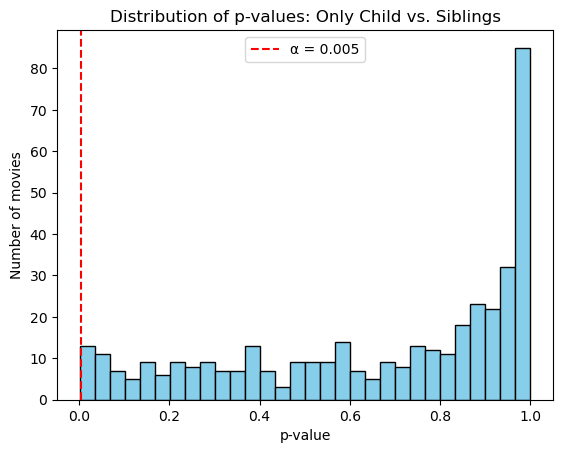

In [24]:
# Visualize p-value distribution for only child effect
import matplotlib.pyplot as plt

plt.hist(valid_p_only, bins=30, color="skyblue", edgecolor="black")
plt.axvline(alpha, color="red", linestyle="--", label="α = 0.005")
plt.title("Distribution of p-values: Only Child vs. Siblings")
plt.xlabel("p-value")
plt.ylabel("Number of movies")
plt.legend()
plt.show()

# Question 7

**Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who
prefer to watch them alone?**

**Hypothsis Testing - Mann–Whitney U test**

In [25]:
import numpy as np
import pandas as pd
from scipy.stats import mannwhitneyu

# Column names
rating_col = "The Wolf of Wall Street (2013)"
social_col = data.columns[476]  # one column to the RIGHT of 'Are you an only child?'

print("Confirming social_col:", social_col)

# Subset valid responses
mask = data[rating_col].notna() & data[social_col].isin([0, 1])
ratings = data.loc[mask, rating_col]
pref = data.loc[mask, social_col]

# Define groups
# 0 = enjoys movies socially (answered “No” to ‘best enjoyed alone’)
# 1 = prefers to watch alone
social = ratings[pref == 0]
alone = ratings[pref == 1]

# Descriptive stats 
n_social, n_alone = len(social), len(alone)
med_social, med_alone = np.median(social), np.median(alone)

# Hypothesis test
# Directional: do social viewers rate the movie higher?
u_stat, p_one = mannwhitneyu(social, alone, alternative="greater")

# Rank-biserial correlation effect size
r = 1 - (2 * u_stat) / (n_social * n_alone)

# Output
print(f"n_social = {n_social}, n_alone = {n_alone}")
print(f"median_social = {med_social}, median_alone = {med_alone}")
print(f"U = {u_stat:.2f}, p_one_tailed = {p_one:.6f}, rank_biserial_r = {r:.3f}")

Confirming social_col: Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
n_social = 270, n_alone = 393
median_social = 3.0, median_alone = 3.5
U = 49303.50, p_one_tailed = 0.943666, rank_biserial_r = 0.071


# Question 8
**What proportion of movies exhibit such a “social watching” effect**

**Hypothsis Testing - Mann–Whitney U test**

In [26]:
from scipy.stats import mannwhitneyu
import numpy as np

alpha = 0.005
social_pref = data["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]
p_values_social = []
skipped = 0  # <-- add this counter

for col in data.columns[:400]:
    ratings = data[col]
    mask = (~np.isnan(ratings)) & ((social_pref == 0) | (social_pref == 1))
    ratings = ratings[mask]
    pref = social_pref[mask]

    social = ratings[pref == 0]
    alone = ratings[pref == 1]

    # Skip movies with too few valid ratings in either group
    if len(social) < 10 or len(alone) < 10:
        p_values_social.append(np.nan)
        skipped += 1   # <-- count skipped movies
        continue

    # Two-tailed Mann–Whitney U test
    u_stat, p_val = mannwhitneyu(social, alone, alternative="two-sided")
    p_values_social.append(p_val)

# Results summary
p_values_social = np.array(p_values_social)
valid_p_social = p_values_social[~np.isnan(p_values_social)]

significant_social = np.sum(valid_p_social < alpha)
proportion_social = significant_social / len(valid_p_social)

print(f"Movies with 'social watching' effect: {significant_social}/{len(valid_p_social)} ({proportion_social:.2%})")
print(f"Movies skipped (too few ratings): {skipped}")
print(f"Proportion skipped: {skipped/400:.2%}")

Movies with 'social watching' effect: 10/400 (2.50%)
Movies skipped (too few ratings): 0
Proportion skipped: 0.00%


# Question 9

**Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)**

**EDA (Explantory Data Analysis)**

In [27]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

# Find the movie columns
home_alone_col = None
nemo_col = None
for col in data.columns:
    if 'Home Alone' in col and '1990' in col:
        home_alone_col = col
    if 'Finding Nemo' in col and '2003' in col:
        nemo_col = col

data[home_alone_col]

0       4.0
1       4.0
2       4.0
3       1.5
4       2.0
       ... 
1092    NaN
1093    3.5
1094    NaN
1095    NaN
1096    3.0
Name: Home Alone (1990), Length: 1097, dtype: float64

In [28]:
home_alone_ratings = data[home_alone_col].dropna()
nemo_ratings = data[nemo_col].dropna()

In [29]:
print(home_alone_ratings)

0       4.0
1       4.0
2       4.0
3       1.5
4       2.0
       ... 
1087    3.5
1090    2.5
1091    3.5
1093    3.5
1096    3.0
Name: Home Alone (1990), Length: 857, dtype: float64


**Hypothsis Testing - KS test**

In [30]:
ks_stat, ks_p = stats.ks_2samp(home_alone_ratings, nemo_ratings)
print(f"KS test: statistic={ks_stat:.3f}, p={ks_p:.4f}")

KS test: statistic=0.153, p=0.0000


/var/folders/66/zrm2l0350978229d3jzlpt900000gn/T/ipykernel_50740/3788951606.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax3.boxplot([home_alone_ratings, nemo_ratings], labels=['Home Alone', 'Finding Nemo'])


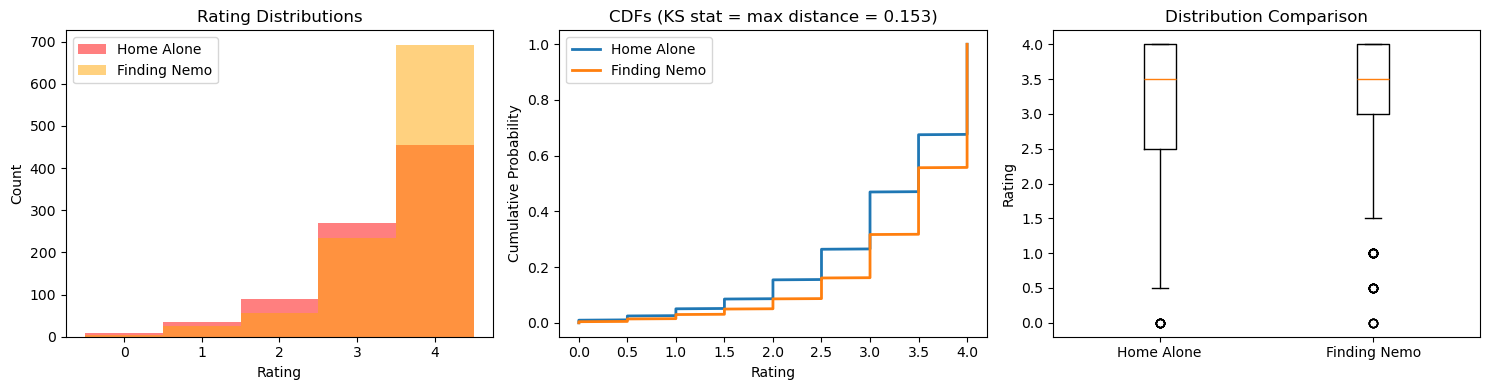

In [31]:
# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Histograms
ax1 = axes[0]
ax1.hist(home_alone_ratings, bins=np.arange(6)-0.5, alpha=0.5, label='Home Alone', color='red')
ax1.hist(nemo_ratings, bins=np.arange(6)-0.5, alpha=0.5, label='Finding Nemo', color='orange')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Count')
ax1.legend()
ax1.set_title('Rating Distributions')

# CDFs (what KS test compares)
ax2 = axes[1]
sorted_ha = np.sort(home_alone_ratings)
sorted_nemo = np.sort(nemo_ratings)
ax2.plot(sorted_ha, np.linspace(0, 1, len(sorted_ha)), label='Home Alone', linewidth=2)
ax2.plot(sorted_nemo, np.linspace(0, 1, len(sorted_nemo)), label='Finding Nemo', linewidth=2)
ax2.set_xlabel('Rating')
ax2.set_ylabel('Cumulative Probability')
ax2.set_title(f'CDFs (KS stat = max distance = {ks_stat:.3f})')
ax2.legend()
# Box plots
ax3 = axes[2]
ax3.boxplot([home_alone_ratings, nemo_ratings], labels=['Home Alone', 'Finding Nemo'])
ax3.set_ylabel('Rating')
ax3.set_title('Distribution Comparison')

plt.tight_layout()
plt.show()


In [32]:
ks_stat, ks_p = stats.ks_2samp(home_alone_ratings, nemo_ratings)
print(f"KS statistic: {ks_stat:.3f}")  # This is your actual maximum distance
print(f"As percentage: {ks_stat*100:.1f}%")

KS statistic: 0.153
As percentage: 15.3%


# Question 10 

**There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these
are of inconsistent quality, as experienced by viewers?**

**EDA (Explantory Data Analysis)**

In [33]:
franchises = ['Star Wars', 'Harry Potter', 'The Matrix', 'Indiana Jones', 
              'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman']

franchise_movies = {}
for franchise in franchises:
    movies = [col for col in data.columns if franchise in col]
    if len(movies) >= 2:  # Need at least 2 movies to test consistency
        franchise_movies[franchise] = movies
    print(f"{franchise}: {len(movies)} movies")

Star Wars: 6 movies
Harry Potter: 4 movies
The Matrix: 3 movies
Indiana Jones: 4 movies
Jurassic Park: 3 movies
Pirates of the Caribbean: 3 movies
Toy Story: 3 movies
Batman: 3 movies


**Hypothsis Testing - Kruskal-Wallis**

In [34]:
from scipy import stats

inconsistent_franchises = 0
for franchise, movies in franchise_movies.items():
    # Get all ratings for each movie in franchise
    movie_ratings = [data[movie].dropna() for movie in movies]
    
    # Kruskal-Wallis test (non-parametric ANOVA)
    h_stat, p_value = stats.kruskal(*movie_ratings)
    
    if p_value < 0.005:  # Your alpha
        inconsistent_franchises += 1
        print(f"{franchise}: Inconsistent (p={p_value:.4f})")
    else:
        print(f"{franchise}: Consistent (p={p_value:.4f})")

Star Wars: Inconsistent (p=0.0000)
Harry Potter: Consistent (p=0.3433)
The Matrix: Inconsistent (p=0.0000)
Indiana Jones: Inconsistent (p=0.0000)
Jurassic Park: Inconsistent (p=0.0000)
Pirates of the Caribbean: Inconsistent (p=0.0000)
Toy Story: Inconsistent (p=0.0000)
Batman: Inconsistent (p=0.0000)


# Extra Credit

**Do people who report being more immersed in movies rate Harry Potter and the Sorcerer’s Stone (2001) higher than those who are less immersed?**

**Hypothsis Testing - Mann–Whitney U test**

In [ ]:
# Split data based on rollercoaster enjoyment and driving fast ratings
median_split = data["I enjoy rollercoasters "].median()
low = data[data["I enjoy rollercoasters "] <= median_split]["I enjoy driving fast"].dropna()
high = data[data["I enjoy rollercoasters "] > median_split]["I enjoy driving fast"].dropna()

# Run KS test
stat, pval = ks_2samp(high, low)
print(f"KS test statistic = {stat:.3f}, p-value = {pval:.4f}")

# Decision rule
alpha = 0.005
if pval < alpha:
    print("Result: p < 0.005, reject H0.")
else:
    print("Result: p ≥ 0.005, fail to reject H0.")


KS test statistic = 0.193, p-value = 0.0000
Result: p < 0.05, reject H0.
Conclusion: The distribution of 'enjoy driving fast' ratings differs between people who like and dislike rollercoasters.


In [ ]:
# Define relevant columns
immersion_col = "When watching a movie I get completely immersed in the alternative reality of the film"
rating_col = "Harry Potter and the Sorcerer's Stone (2001)"

# Clean immersion responses (remove invalid 6s)
data.loc[data[immersion_col] > 5, immersion_col] = np.nan

# Drop missing ratings and immersion values
mask = data[rating_col].notna() & data[immersion_col].notna()
ratings = data.loc[mask, rating_col]
immersion = data.loc[mask, immersion_col]
# Split into high vs low immersion groups using median split 
median_imm = np.median(immersion)
high_mask = immersion > median_imm
low_mask  = immersion <= median_imm

high = ratings[high_mask]
low  = ratings[low_mask]

# Descriptive statistics 
n_high, n_low = len(high), len(low)
med_high, med_low = np.median(high), np.median(low)

# Mann–Whitney U test
# Directional: do high-immersion viewers rate it higher?
u_stat, p_val = mannwhitneyu(high, low, alternative="greater")

# Output results
print(f"n_high = {n_high}, n_low = {n_low}")
print(f"Median (high immersion) = {med_high:.2f}, Median (low immersion) = {med_low:.2f}")
print(f"U statistic = {u_stat:.2f}, p_one_tailed = {p_val:.6f}")

n_high = 267, n_low = 455
Median (high immersion) = 4.00, Median (low immersion) = 3.50
U statistic = 69516.00, p_one_tailed = 0.000324
